# Analisando os dados dos filmes

- Vamos iniciar a nossa análise fazendo uma nova importação das bases de dados: "movies.csv" e "ratings.csv", em seguida precisamos alterar o nome das colunas de cada base de dados para facilitar a visualização:

In [11]:
import pandas as pd
baseFilmes = pd.read_csv("https://raw.githubusercontent.com/gitdowellington/primeiros-passos-data-science/refs/heads/main/1.analise-exploratoria/base-dados/movies.csv")
baseFilmes.columns = ['filmeId', 'titulo', 'generos']
baseFilmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
baseNotas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv")
baseNotas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
baseNotas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


- Destas bases, vamos nos concentrar na análise dos 2 primeiros filmes “Toy Story” e “Jumanji” chamando-os por meio de seus IDs na baseNotas que criamos. Para isso, vamos ler a média das notas de cada um dos 2 filmes utilizando o método query():

In [23]:
media_notas_filme1 = baseNotas.query('filmeId == 1')['nota'].mean()
media_notasfilme2 = baseNotas.query('filmeId == 2')['nota'].mean()

print(f"A média das notas do filmeId == 1 é: {media_notas_filme1}")
print(f"A média das notas do filmeId == 2 é: {media_notasfilme2}")

A média das notas do filmeId == 1 é: 3.9209302325581397
A média das notas do filmeId == 2 é: 3.4318181818181817


- Agora, vamos calcular média de todos filmes individualmente, agrupando-os por meio do método groupby( ) e utilizando como fórmula de agregação de dados o mean( ).

In [25]:
medias_por_filmes = baseNotas.groupby("filmeId")['nota'].mean()

print(f'A seguir a média de notas de cada filme:\n{medias_por_filmes}')

A seguir a média de notas de cada filme:
filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64


- Vamos observar agora a distribuição das médias por filme? Criaremos um histograma e um boxplot, separadamente para esse processo:

<Axes: ylabel='Frequency'>

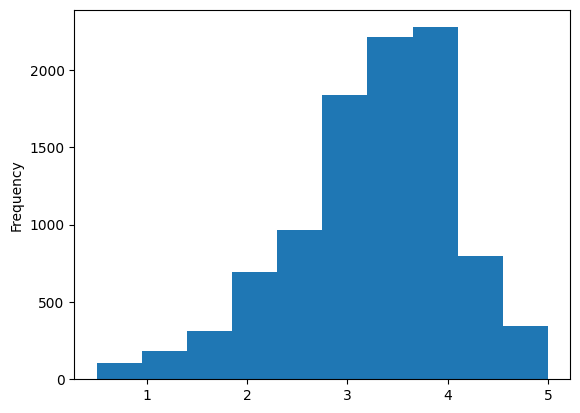

In [27]:
medias_por_filmes.plot(kind="hist")

<Axes: ylabel='nota'>

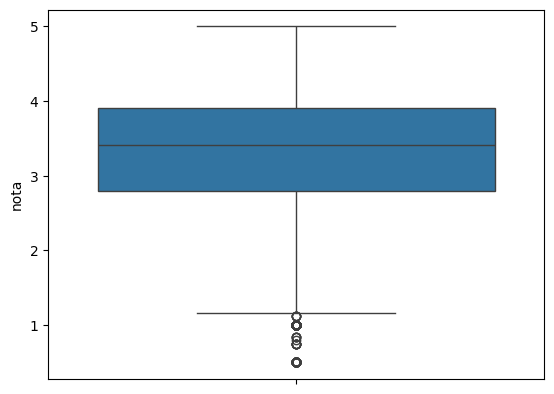

In [29]:
import seaborn as sns

sns.boxplot(medias_por_filmes)